# Name : Sanika Kapoor

### Task 2: Predict the optimum number of clusters using the given 'Iris' dataset and represent it visually. (Unsupervised ML)

### Dataset: https://bit.ly/3kXTdox 

### Importing the libraries

In [21]:
# warnings
import warnings 
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Loading the Iris Dataset

In [8]:
iris= datasets.load_iris()
print('Data:', iris.data)
print('Feature Names:', iris.feature_names)
print('Target Names:', iris.target_names)

Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 

In [10]:
## Converting data into a DataFrame
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Checking for Null and Catgorical Data

In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

There are no null values.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


There are no categorical values.

### Data Visualization 

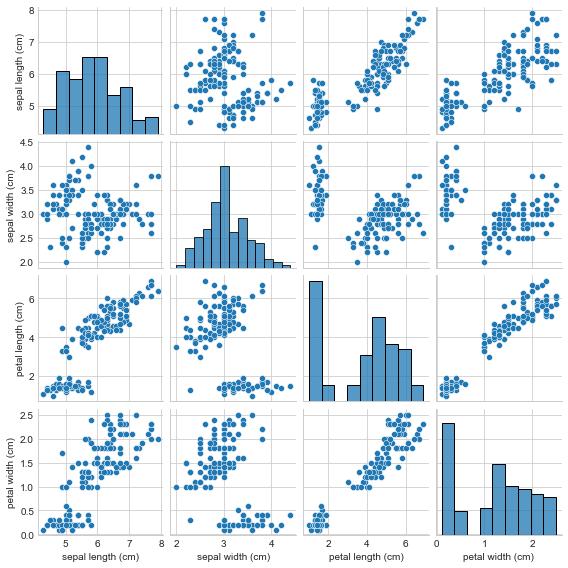

In [16]:
sns.pairplot(df, height=2)

<AxesSubplot:>

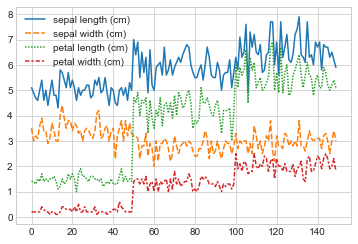

In [17]:
sns.lineplot(data=df)


### Clustering Using Kmeans  

The clustering technique used here is KMeans Classification. To predict the optimum number of clusters(k), we do the following:



In [18]:
x= iris.data


In [22]:
from sklearn.cluster import KMeans
wcss=[] ## Array that will store 'Within Cluster Sum of Squares' for all 10 values of k.

## We take number of clusters ranging from 1 to 10.
for i in range(1,11):
    k_means=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

To find the optimum value of k, we are using the elbow method. Plotting the line graph to observe the elbow:




Text(0, 0.5, 'WCSS')

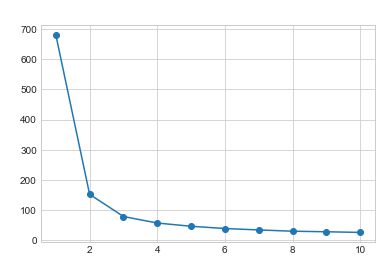

In [24]:
plt.plot(range(1,11),wcss, marker='o')
plt.title('The elbow method', color='white', fontsize='16')
plt.xlabel('Number of clusters', color='white')
plt.ylabel('WCSS', color='white')

According to the this method, the 'elbow' is the point in the graph where the WCSS (Within Cluster Sum of Squares) does not decrese significantly with the increasing number of iterations.Thus, the optimum number of clusters is where the elbow occurs, which in this case is 3.



### Model Training

In [26]:
## Applying kmeans for k=3
k_means=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = k_means.fit_predict(x)  ## Computes cluster centers and predicts the cluster index for each sample.

In [27]:
k_means.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Cluster Visualization

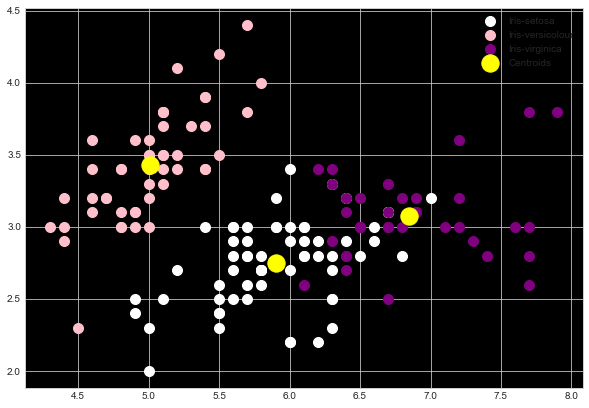

In [28]:
## Visualizing on the first 2 columns.
plt.figure(figsize=(10,7))
plt.axes().set_facecolor('black')
plt.scatter(x[y == 0, 0], x[y == 0, 1],s=100, c='white',label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1],s=100, c='pink',label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],s=100, c='purple',label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1],s = 300, c = 'yellow', label = 'Centroids')
plt.legend()